# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sinasc = pd.read_csv('/content/Profissão Cientista de Dados M6 - SINASC_RO_2019.csv')

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [3]:
sinasc.loc[sinasc['APGAR5'] < 4, 'APGAR5_cat'] = 'asfixia grave'
sinasc.loc[(sinasc['APGAR5'] > 4) & (sinasc['APGAR5'] <= 5),
           'APGAR5_cat'] = 'asfixia moderada'
sinasc.loc[(sinasc['APGAR5'] > 5) & (sinasc['APGAR5'] < 8),
           'APGAR5_cat'] = 'asfixia leve'
sinasc.loc[(sinasc['APGAR5'] >= 8), 'APGAR5_cat'] = 'normal'

In [4]:
sinasc.APGAR5_cat.value_counts()


,count
APGAR5_cat,
normal,26463
asfixia leve,320
asfixia grave,74
asfixia moderada,45


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

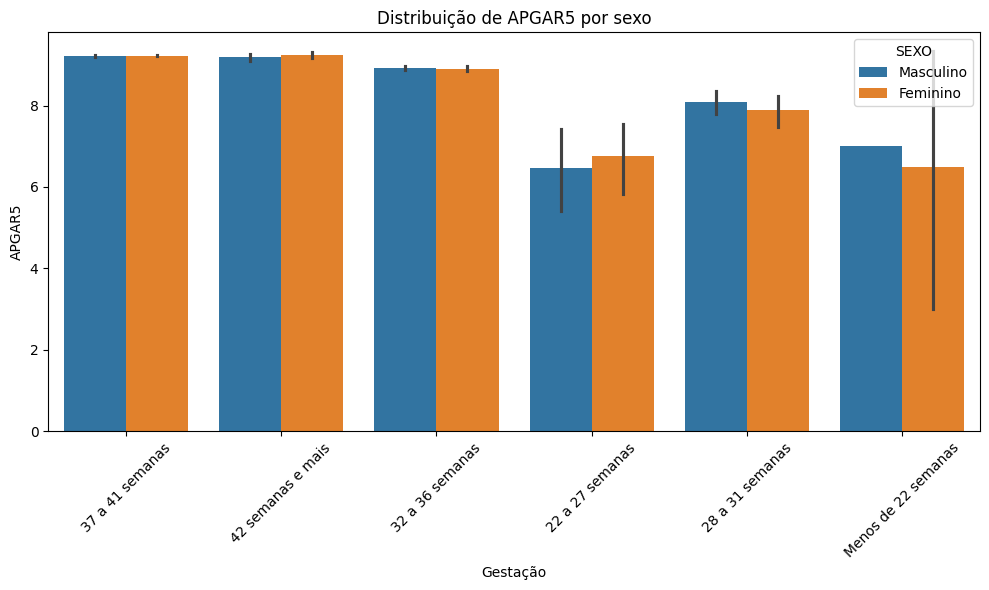

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a grouped bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.barplot(data=sinasc,
            x='GESTACAO',
            y='APGAR5',
            hue='SEXO',
            )
plt.xticks(rotation=45)
plt.title('Distribuição de APGAR5 por sexo')
plt.xlabel('Gestação')
plt.ylabel('APGAR5')
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [33]:
tabela_cruzada = pd.crosstab(sinasc['GESTACAO'], sinasc['APGAR5'])
tabela_cruzada

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


In [44]:
tabela_cruzada.sum()

,0
APGAR5,
0.0,16
1.0,22
2.0,16
3.0,14
4.0,21
5.0,40
6.0,72
7.0,234
8.0,1908


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [118]:
tabela_cruzada_percentual = tabela_cruzada.div(tabela_cruzada.sum(axis=1), axis=0)
tabela_cruzada_percentual.sum (axis =1)

,0
GESTACAO,
22 a 27 semanas,1.0
28 a 31 semanas,1.0
32 a 36 semanas,1.0
37 a 41 semanas,1.0
42 semanas e mais,1.0
Menos de 22 semanas,1.0


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

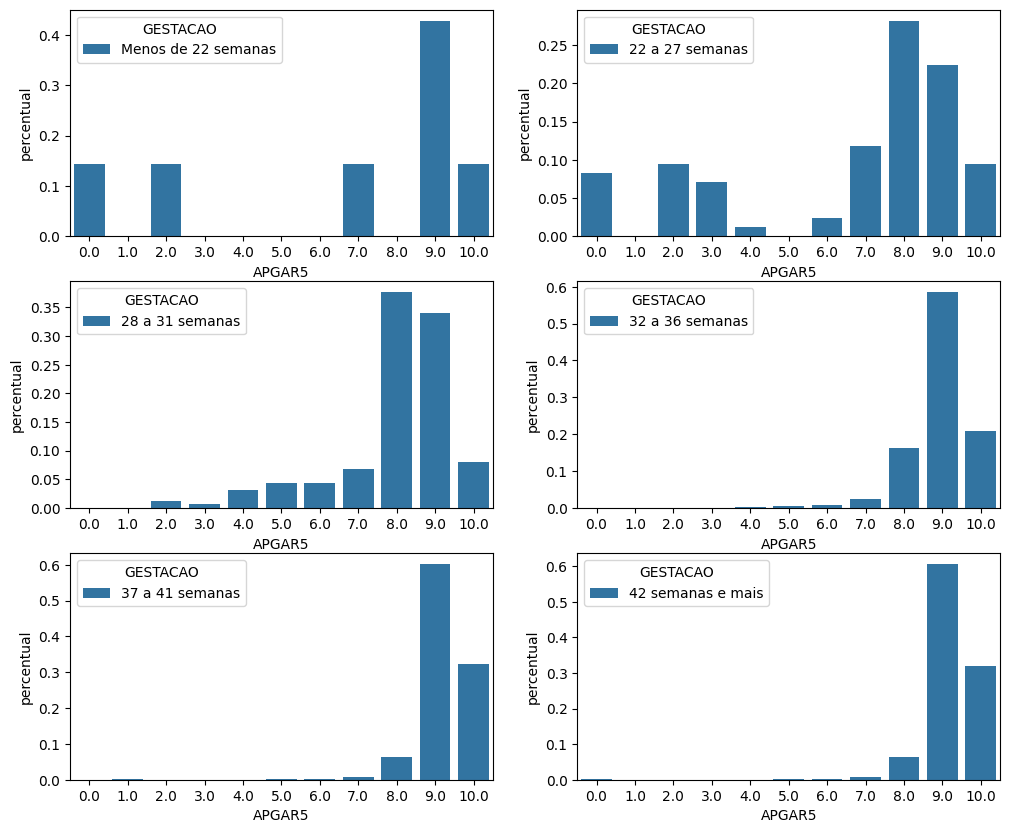

<Figure size 1200x600 with 0 Axes>

In [120]:
tabela_cruzada_percentual_long = tabela_cruzada_percentual.reset_index().melt('GESTACAO', var_name='APGAR5', value_name='percentual')
tabela_cruzada_percentual_long['APGAR5'] = tabela_cruzada_percentual_long['APGAR5'].astype(str)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
plt.figure(figsize=(12, 6))
sns.barplot(ax= axes[0,0], data=tabela_cruzada_percentual_long[tabela_cruzada_percentual_long['GESTACAO'] == 'Menos de 22 semanas'], x='APGAR5', y='percentual',hue='GESTACAO')
sns.barplot(ax= axes[0,1], data=tabela_cruzada_percentual_long[tabela_cruzada_percentual_long['GESTACAO'] == '22 a 27 semanas'], x='APGAR5', y='percentual', hue='GESTACAO')
sns.barplot(ax= axes[1,0], data=tabela_cruzada_percentual_long[tabela_cruzada_percentual_long['GESTACAO'] == '28 a 31 semanas'], x='APGAR5', y='percentual', hue='GESTACAO')
sns.barplot(ax= axes[1,1], data=tabela_cruzada_percentual_long[tabela_cruzada_percentual_long['GESTACAO'] == '32 a 36 semanas'], x='APGAR5', y='percentual', hue='GESTACAO')
sns.barplot(ax= axes[2,0], data=tabela_cruzada_percentual_long[tabela_cruzada_percentual_long['GESTACAO'] == '37 a 41 semanas'], x='APGAR5', y='percentual', hue='GESTACAO')
sns.barplot(ax= axes[2,1], data=tabela_cruzada_percentual_long[tabela_cruzada_percentual_long['GESTACAO'] == '42 semanas e mais'], x='APGAR5', y='percentual', hue='GESTACAO')
plt.tight_layout()
plt.show()

<Axes: xlabel='GESTACAO', ylabel='percentual'>

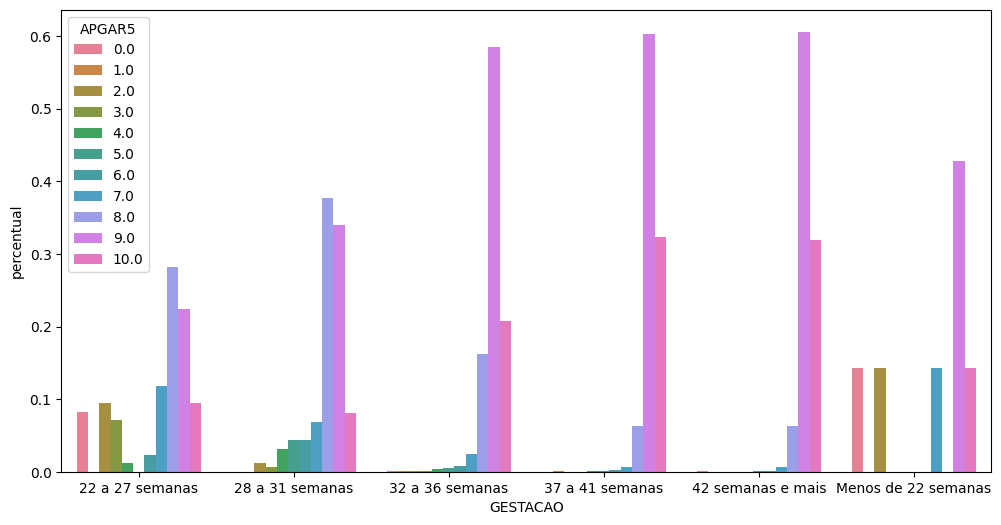

In [217]:
plt.figure(figsize=(12, 6))
sns.barplot(data=tabela_cruzada_percentual_long, x='GESTACAO', y='percentual', hue='APGAR5')

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

<Axes: xlabel='APGAR5_cat', ylabel='PESO'>

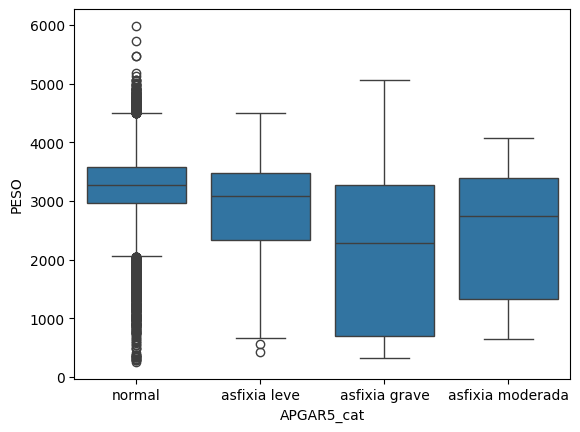

In [216]:
sns.boxplot(data=sinasc, x='APGAR5_cat', y='PESO')

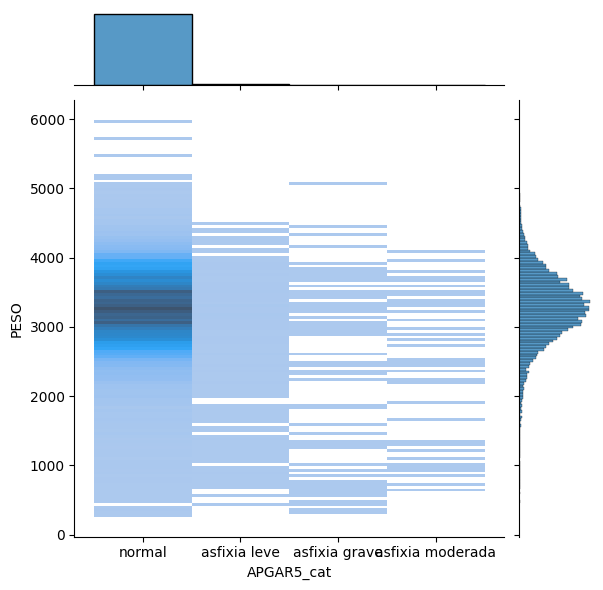

In [214]:
sns.jointplot(data=sinasc, x='APGAR5_cat', y='PESO', kind='hist')

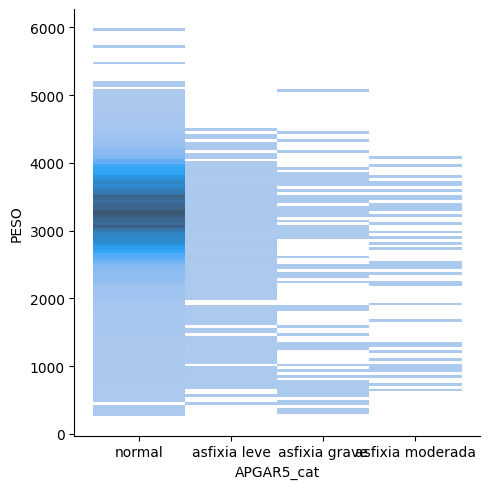

In [213]:
sns.displot(data=sinasc, x='APGAR5_cat', y='PESO')